### Functional Connectivity Analysis of UCLA Data

In [15]:
import os
import nilearn as nil
import matplotlib.pyplot as plt
from nilearn import image as img
from nilearn import plotting as plot

In [10]:
#Base directory for fmriprep output
fmriprep_dir = '../data/{mod}/'

In [11]:
#Display files inside of T1
t1_dir = fmriprep_dir.format(mod='anat') 
os.listdir(t1_dir) 

['sub-50083_T1w_pial.R.surf.gii',
 'sub-10206_T1w_brainmask.nii.gz',
 'sub-10206_T1w_dtissue.nii.gz',
 'sub-10206_T1w_inflated.L.surf.gii',
 'sub-10206_T1w_inflated.R.surf.gii',
 'sub-10206_T1w_midthickness.L.surf.gii',
 'sub-10206_T1w_midthickness.R.surf.gii',
 'sub-10206_T1w_pial.L.surf.gii',
 'sub-10206_T1w_pial.R.surf.gii',
 'sub-10206_T1w_preproc.nii.gz',
 'sub-10206_T1w_smoothwm.L.surf.gii',
 'sub-10206_T1w_smoothwm.R.surf.gii',
 'sub-10206_T1w_space-MNI152NLin2009cAsym_brainmask.nii.gz',
 'sub-10557_T1w_pial.L.surf.gii',
 'sub-10557_T1w_pial.R.surf.gii',
 'sub-10557_T1w_preproc.nii.gz',
 'sub-10557_T1w_smoothwm.L.surf.gii',
 'sub-10557_T1w_smoothwm.R.surf.gii',
 'sub-10557_T1w_space-MNI152NLin2009cAsym_brainmask.nii.gz',
 'sub-10557_T1w_space-MNI152NLin2009cAsym_class-CSF_probtissue.nii.gz',
 'sub-10557_T1w_space-MNI152NLin2009cAsym_class-GM_probtissue.nii.gz',
 'sub-10557_T1w_space-MNI152NLin2009cAsym_class-WM_probtissue.nii.gz',
 'sub-10557_T1w_space-MNI152NLin2009cAsym_prepro

### Warming up with Nilearn -- image operations
#### Applying masking operation in nilearn
Here we show how easy it is to apply a mask to nifti images using nilearn. 
We first pick an example T1 image and mask from the fmriprep output, then we apply the mask and view the result...

In [32]:
#How does nilearn deal with images
ex_T1 = os.path.join(t1_dir,'sub-10206_T1w_preproc.nii.gz')
ex_bm = os.path.join(t1_dir,'sub-10206_T1w_brainmask.nii.gz')

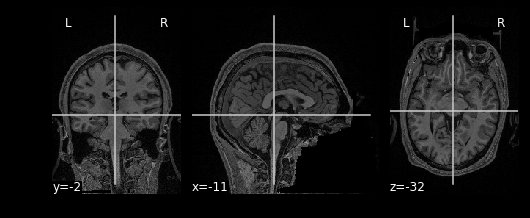

In [33]:
#Viewing T1
plot.plot_anat(ex_T1)

Nilearn uses nibabel under the hood to store nifti images. So you can think of images (similar to nibabel) as a 3D array (volume) with values assigned to each (x,y,z) coordinate. With 3D arrays we can perform operations and nilearn makes this easy!

Say we wanted to invert a T1 image, that is flip the colorscale. We could do this as follows:

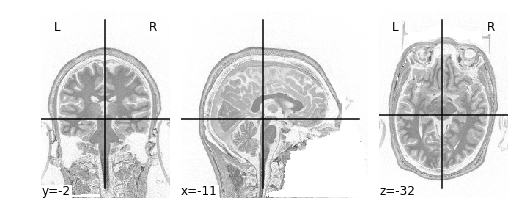

In [51]:
#Inverting a T1 image example
invert_img = nil.image.math_img('1-a',a=ex_T1)
plot.plot_anat(invert_img) 

Now we could use a similar technique to apply a mask. 
A mask is simply a 3D volume with 0's and 1's. The 1's indicate the areas in which areas are to be preserved. 

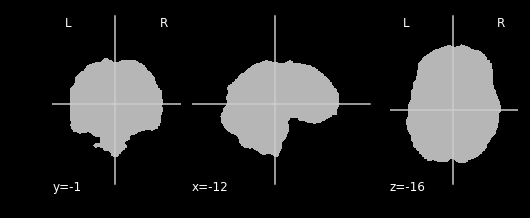

In [52]:
#Viewing mask
plot.plot_anat(ex_bm) 

The idea behind applying a mask is multiplying the mask directly by the image in an element-wise fashion. 
The end result is that all voxels (x,y,z) in the T1 image corresponding with a 1 in the mask with the same coordinate (x,y,z) is preserved. Everything else is put to 0.

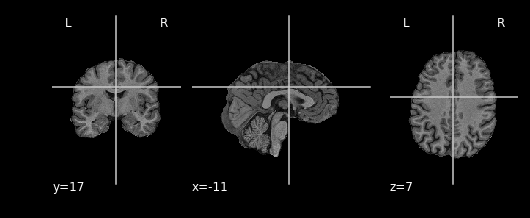

In [53]:
#Applying a mask is as easy as using the straight formula
masked_t1 = nil.image.math_img('a*b',a=ex_T1,b=ex_bm)
plot.plot_anat(masked_t1)

Exercise: 
Try applying the mask but getting everything but the brain!